In [226]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from datetime import date, timedelta
from sklearn.impute import SimpleImputer
import scipy.optimize as op

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [227]:
csv_path = os.path.join('..','data','data_weather_cleaned.csv')

In [228]:
df = pd.read_csv(csv_path)

In [229]:
df

,date,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos
0,2010-01-01 00:00:00,7510.0,44.830667,-0.691333,47.0,99050.0,230.0,9.8,9.6,81.0,0.0,0,98410.0,-0.766044,-6.427876e-01
1,2010-01-01 03:00:00,7510.0,44.830667,-0.691333,47.0,99160.0,250.0,11.8,8.7,87.0,0.0,0,98520.0,-0.939693,-3.420201e-01
2,2010-01-01 06:00:00,7510.0,44.830667,-0.691333,47.0,99570.0,290.0,5.1,7.6,91.0,0.0,0,98920.0,-0.939693,3.420201e-01
3,2010-01-01 09:00:00,7510.0,44.830667,-0.691333,47.0,99990.0,310.0,5.7,6.8,92.0,0.0,0,99340.0,-0.766044,6.427876e-01
4,2010-01-01 12:00:00,7510.0,44.830667,-0.691333,47.0,100350.0,310.0,6.2,6.6,82.0,0.0,0,99690.0,-0.766044,6.427876e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505852,2021-07-31 09:00:00,7650.0,43.437667,5.216000,9.0,100920.0,310.0,3.2,27.2,58.0,0.0,0,100560.0,-0.766044,6.427876e-01
505853,2021-07-31 12:00:00,7650.0,43.437667,5.216000,9.0,100770.0,270.0,6.1,30.6,49.0,0.0,0,100410.0,-1.000000,-1.836970e-16
505854,2021-07-31 15:00:00,7650.0,43.437667,5.216000,9.0,100680.0,310.0,8.2,30.0,40.0,0.0,0,100320.0,-0.766044,6.427876e-01
505855,2021-07-31 18:00:00,7650.0,43.437667,5.216000,9.0,100750.0,320.0,8.0,27.9,45.0,0.0,0,100390.0,-0.642788,7.660444e-01


In [230]:
df_7577 = df[df['numer_sta'] == 7577.0]
df_7577

,date,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos
370914,2010-01-01 00:00:00,7577.0,44.581167,4.733,73.0,99050.0,360.0,2.1,7.3,96.0,0.0,0,98170.0,-2.449294e-16,1.000000
370915,2010-01-01 03:00:00,7577.0,44.581167,4.733,73.0,98790.0,350.0,5.1,7.7,94.0,0.0,0,97910.0,-1.736482e-01,0.984808
370916,2010-01-01 06:00:00,7577.0,44.581167,4.733,73.0,98840.0,50.0,1.5,7.5,95.0,0.0,1,97960.0,7.660444e-01,0.642788
370917,2010-01-01 09:00:00,7577.0,44.581167,4.733,73.0,99230.0,240.0,1.0,7.6,94.0,0.0,0,98350.0,-8.660254e-01,-0.500000
370918,2010-01-01 12:00:00,7577.0,44.581167,4.733,73.0,99410.0,160.0,0.5,8.3,95.0,0.0,0,98530.0,3.420201e-01,-0.939693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404684,2021-07-31 09:00:00,7577.0,44.581167,4.733,73.0,101130.0,10.0,5.0,20.8,74.0,0.0,0,100270.0,1.736482e-01,0.984808
404685,2021-07-31 12:00:00,7577.0,44.581167,4.733,73.0,101020.0,20.0,5.3,23.4,62.0,0.0,0,100170.0,3.420201e-01,0.939693
404686,2021-07-31 15:00:00,7577.0,44.581167,4.733,73.0,100890.0,20.0,5.3,24.2,61.0,0.0,0,100040.0,3.420201e-01,0.939693
404687,2021-07-31 18:00:00,7577.0,44.581167,4.733,73.0,101080.0,20.0,3.7,20.4,74.0,0.0,0,100220.0,3.420201e-01,0.939693


In [231]:
df_7577 = df_7577.drop_duplicates()
df_7577

,date,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos
370914,2010-01-01 00:00:00,7577.0,44.581167,4.733,73.0,99050.0,360.0,2.1,7.3,96.0,0.0,0,98170.0,-2.449294e-16,1.000000
370915,2010-01-01 03:00:00,7577.0,44.581167,4.733,73.0,98790.0,350.0,5.1,7.7,94.0,0.0,0,97910.0,-1.736482e-01,0.984808
370916,2010-01-01 06:00:00,7577.0,44.581167,4.733,73.0,98840.0,50.0,1.5,7.5,95.0,0.0,1,97960.0,7.660444e-01,0.642788
370917,2010-01-01 09:00:00,7577.0,44.581167,4.733,73.0,99230.0,240.0,1.0,7.6,94.0,0.0,0,98350.0,-8.660254e-01,-0.500000
370918,2010-01-01 12:00:00,7577.0,44.581167,4.733,73.0,99410.0,160.0,0.5,8.3,95.0,0.0,0,98530.0,3.420201e-01,-0.939693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404684,2021-07-31 09:00:00,7577.0,44.581167,4.733,73.0,101130.0,10.0,5.0,20.8,74.0,0.0,0,100270.0,1.736482e-01,0.984808
404685,2021-07-31 12:00:00,7577.0,44.581167,4.733,73.0,101020.0,20.0,5.3,23.4,62.0,0.0,0,100170.0,3.420201e-01,0.939693
404686,2021-07-31 15:00:00,7577.0,44.581167,4.733,73.0,100890.0,20.0,5.3,24.2,61.0,0.0,0,100040.0,3.420201e-01,0.939693
404687,2021-07-31 18:00:00,7577.0,44.581167,4.733,73.0,101080.0,20.0,3.7,20.4,74.0,0.0,0,100220.0,3.420201e-01,0.939693


In [232]:
df_7577['date'] = pd.to_datetime(df_7577['date'])
#df_t = df_7577.set_index('date')[['t']]
df_7577.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33769 entries, 370914 to 404688
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       33769 non-null  datetime64[ns]
 1   numer_sta  33769 non-null  float64       
 2   Latitude   33769 non-null  float64       
 3   Longitude  33769 non-null  float64       
 4   Altitude   33769 non-null  float64       
 5   pmer       33769 non-null  float64       
 6   dd         33769 non-null  float64       
 7   ff         33769 non-null  float64       
 8   t          33769 non-null  float64       
 9   u          33769 non-null  float64       
 10  ssfrai     33769 non-null  float64       
 11  rr3        33769 non-null  int64         
 12  pres       33768 non-null  float64       
 13  dd_sin     33769 non-null  float64       
 14  dd_cos     33769 non-null  float64       
dtypes: datetime64[ns](1), float64(13), int64(1)
memory usage: 4.1 MB


<ipython-input-232-682215541f3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7577['date'] = pd.to_datetime(df_7577['date'])


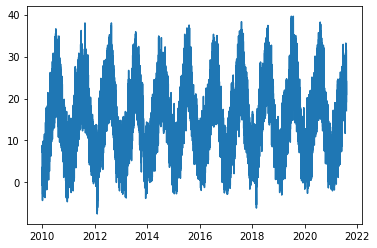

In [233]:
plt.plot(df_7577.date, df_7577.t)

In [234]:
start_date = pd.to_datetime("2010-01-01 00:00:00")
end_date = pd.to_datetime("2021-07-31 21:00:00") #Excluding last

#List of all dates
all_date = pd.date_range(start_date, end_date, freq='3H')

#Left join your main data on dates data
all_date_df = pd.DataFrame({'date':all_date})
all_date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33840 entries, 0 to 33839
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    33840 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 264.5 KB


In [235]:
(33840 - 33769)/8

8.875

In [236]:
# len(list(set(df_7577["date"]) - set(all_date_df["date"])))
# len(list(set(df_7577["date"]) ^ set(all_date_df["date"])))
df_f = pd.merge(df_7577, all_date_df, how="outer", on="date")

In [237]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33840 entries, 0 to 33839
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       33840 non-null  datetime64[ns]
 1   numer_sta  33769 non-null  float64       
 2   Latitude   33769 non-null  float64       
 3   Longitude  33769 non-null  float64       
 4   Altitude   33769 non-null  float64       
 5   pmer       33769 non-null  float64       
 6   dd         33769 non-null  float64       
 7   ff         33769 non-null  float64       
 8   t          33769 non-null  float64       
 9   u          33769 non-null  float64       
 10  ssfrai     33769 non-null  float64       
 11  rr3        33769 non-null  float64       
 12  pres       33768 non-null  float64       
 13  dd_sin     33769 non-null  float64       
 14  dd_cos     33769 non-null  float64       
dtypes: datetime64[ns](1), float64(14)
memory usage: 4.1 MB


In [238]:
df_f.isnull().sum().sort_values(ascending=False)

pres         72
numer_sta    71
Latitude     71
Longitude    71
Altitude     71
pmer         71
dd           71
ff           71
t            71
u            71
ssfrai       71
rr3          71
dd_sin       71
dd_cos       71
date          0
dtype: int64

In [239]:
imputer = SimpleImputer(strategy="mean")
imputer.fit(df_f[['t']])

SimpleImputer()

In [240]:
df_f['t'] = imputer.transform(df_f[['t']])

In [241]:
df_f.isnull().sum().sort_values(ascending=False)

pres         72
numer_sta    71
Latitude     71
Longitude    71
Altitude     71
pmer         71
dd           71
ff           71
u            71
ssfrai       71
rr3          71
dd_sin       71
dd_cos       71
date          0
t             0
dtype: int64

In [242]:
df_f.reset_index(drop=True)

,date,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos
0,2010-01-01 00:00:00,7577.0,44.581167,4.733,73.0,99050.0,360.0,2.1,7.300000,96.0,0.0,0.0,98170.0,-2.449294e-16,1.000000
1,2010-01-01 03:00:00,7577.0,44.581167,4.733,73.0,98790.0,350.0,5.1,7.700000,94.0,0.0,0.0,97910.0,-1.736482e-01,0.984808
2,2010-01-01 06:00:00,7577.0,44.581167,4.733,73.0,98840.0,50.0,1.5,7.500000,95.0,0.0,1.0,97960.0,7.660444e-01,0.642788
3,2010-01-01 09:00:00,7577.0,44.581167,4.733,73.0,99230.0,240.0,1.0,7.600000,94.0,0.0,0.0,98350.0,-8.660254e-01,-0.500000
4,2010-01-01 12:00:00,7577.0,44.581167,4.733,73.0,99410.0,160.0,0.5,8.300000,95.0,0.0,0.0,98530.0,3.420201e-01,-0.939693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33835,2020-06-27 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.365243,NaN,NaN,NaN,NaN,NaN,NaN
33836,2020-12-05 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.365243,NaN,NaN,NaN,NaN,NaN,NaN
33837,2020-12-09 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.365243,NaN,NaN,NaN,NaN,NaN,NaN
33838,2021-01-16 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.365243,NaN,NaN,NaN,NaN,NaN,NaN


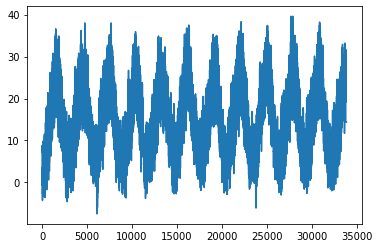

In [299]:
plt.plot(df_f.index, df_f.t)

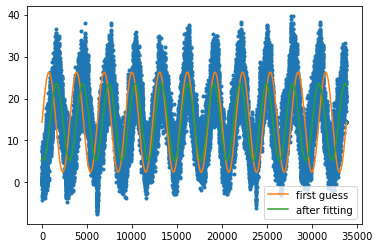

In [298]:
def my_fit(t, data):

    guess_mean = np.mean(data)
    guess_std = 3*np.std(data)/(2**0.5)/(2**0.5)
    guess_phase = 0
    guess_freq = 11
    guess_amp = 1

    data_first_guess = guess_std*np.sin(guess_freq*2*np.pi*t/len(t)+guess_phase) + guess_mean

    optimize_func = lambda x: x[0]*np.sin(x[1]*2*np.pi*t/len(t)+x[2]) + x[3] - data
    est_amp, est_freq, est_phase, est_mean = op.leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]
    return (est_amp*np.sin(est_freq*2*np.pi*t/len(t)+est_phase)+est_mean), data_first_guess

t = df_f.index
data = df_f['t']
data_fit, data_first=my_fit(t, data)

plt.plot(t, data, '.')
plt.plot(t, data_first, label='first guess')
plt.plot(t, data_fit, label='after fitting')
plt.legend()
plt.show()